## Deep Learning (Short Intro)

(Very) Quick intro to Torch and TensorFlow

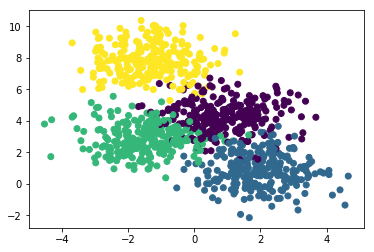

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
#visualize the data
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

#splitting the data into train and test
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)

### TensorFlow

#### 1. Variables

Variables are created and encoded through the class tf.Variable. A variable represents a tensor whose value can be modified by executing operations on the variable. TensorFlow also gives you the possibility to declare constants for which the value cannot be changed. 

Play a little with the tensorFlow variables. Create some tensors, add them, multiply them, convert them to numy, print their shape and values. 

In [2]:
import tensorflow as tf

# Create a TensorFlow constant
var1 = tf.constant(2.0, name="var1")
cons1 = tf.constant(2.0, name="cons1")


d = tf.add(b, c, name='d')
e = tf.add(c, const, name='e')
a = tf.multiply(d, e, name='a')

To start a program in Tensor Flow, the first step is to initialise the variables and the graph structure. This is done through the line 'init_op = tf.global_variables_initializer()'. We then need to open a session and run the output of the graph. 

In [ ]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    # compute the output of the graph
    a_out = sess.run(a)
    print("Variable a is {}".format(a_out))

Once you have done this, you should be able to check the result through a call to tensorBoard.

Now that you are familiar with the basic types in tensorFLow, you will code your first neural network. We will build a network of the form

\begin{align}
z^{(\ell+1)} &= W^{(\ell)}x+b^{(\ell)}\\
h^{(\ell+1)}& = f(z^{(\ell+1)})
\end{align}

You can take $f$ to be the Relu function. We can use tf variables to store the weights.

In [ ]:
'''Generate variables encoding the weights and initialize them at random'''




Use the function tf.add and tf.matmul functions on your variables to get the result W_ix+b_i and conclude with a line
tf.nn.relu() to apply the activation function on the result. Do the same with a softmax for the ouptut layer

We then need to define the loss we want to use. As usual, we will take the binary cross entropy loss. Define it simply by using the simple operations and the tf.log function (you can also use tf.reduce_mean). 

Given our model and the loss (which encodes our model for the neural networks), we are left with defining the optimizer. You can do this through the following line :
    
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(your_loss)


As indicated above, a Tensor flow script is stored as a [https://www.tensorflow.org/tensorboard/graphs](graph) containing each of your variables and representing the connections between those variables. In order to initialize the graph and its associated variables, we need to add the line init_op = tf.global_variables_initializer(). Only after running tf.global_variables_initializer() in a session will your variables hold the values you told them to hold when you declare them


In [ ]:

init_op = tf.global_variables_initializer()


Again, as above, once the TF graph has been initialized, we need to open a TF session to encode our operations.

In [ ]:
# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   
   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            
            '''get the data corresponding to the current batch'''
             _, c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        

You can play a little with the lines above and try to for example display some measure of accuracy and you cna try to visualize the graph with tensorBoard 

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorboard

### PyTorch

Let us now do the same in PyTorch. In PyTorch, we can simply load the nn module. The network can then be built through a call to the function 'nn.Sequential()' which takes as arguments. Define your network by alternating between linear layers and relu's activation and finish with a softmax. Apply your network to a particular sample to make sure that forward propagation works properly

In [3]:
import torch.nn as nn
from torch import optim



'''build the network here'''





To train the network, we will need two components:

   1. A proper __Loss function__. The loss function can be defined from the module torch.nn.functional (take for example the binary cross entropy loss)
   

   2. The torch.optim package which implements various __optimization algorithms__. The most common one is SGD(model.parameters(), lr=0.01, momentum=0.9). Set up the optimizer below. When you call the optimizer you have to tell it what parameter you optimize on.  
   
   
From those two components, we can then apply SGD iterations. Here we will run through every sample pair $\left\{x^{(i)}, t^{(i)}\right\}$ in the dataset multiple times. Each complete pass through the whole set of samples being known as an epoch. We will thus complete multiple epochs. 

Torch provide $3$ useful functions to apply the gradient steps. The 

__loss.backward()__ computes the derivative of the loss w.r.t. the parameters of your network (or anything requiring gradients) using backpropagation.

__opt.step()__ updates the parameters by one step based on the value of the gradient which is stored in the .grad attribute

__zero_grad__ clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).

In PyTorch, the gradient are stored in the tensor themselves. After computing the gradients through loss.backward(), for all tensors in the model, calling optimizer.step() makes the optimizer iterate over all parameters (tensors) it is supposed to update and use their internally stored grad to update their values.

The backward() function is called on the combination loss = binaryCE(NeuralNet(x), y)

In [ ]:
import torch.nn.functional as F

'''We will follow and SGD approach and run through the dataset, applying each 
gradient step to a single sample at a time'''

for epoch in range(1000):
    
    '''complete the iterations'''